In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

dir_list = os.listdir('Primary Care Calibration\\Manually Validated Participants')
calList = pandas.read_excel('Primary Care Calibration\\Manually Validated Participants\\Calibration List.xlsx').to_numpy()

inds = np.zeros(len(dir_list)-1)
for i in range(len(dir_list)-1):
    if calList[i, 1]=='Good':
        inds[i] = 1

In [2]:
from sko.PSO import PSO
import random
import sys

def globalR2(data):
    n = len(data[:, 0])
    r2 = np.zeros(n)
    for i in range(n):
        r2[i] = data[i, :] @ data[i, :]
    return r2

def circFunc(p, data):
    n = len(data[:, 0])
    dispMatr = np.ones(shape=(n))[None].T @ p[None]
    r2 = globalR2(data - dispMatr)
    inds = np.where(r2<10000)[0]
    l = len(inds)
    if l==0:
        return 99999999
    else:
        sum = 0
        for i in range(l):
            sum = sum + r2[inds[i]]
        return sum/l**2

coms = np.zeros(shape=(2, int(sum(inds))))
m = 0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        psoFunc = lambda p: circFunc(p, validData[:, 4:])
        seed = random.randrange(0, sys.maxsize); random.seed(seed)
        pso = PSO(func=psoFunc, n_dim=2, pop=40, max_iter=30, lb=[0, 0], ub=[1920, 1080], w=0.7, c1=0.5, c2=0.5) # performs PSO fitting over omegas
        pso.run()

        coms[:, m] = pso.gbest_x
        m = m + 1

[[ 943.54369597  985.09115379  954.25176999  916.96793714  994.14327068
   992.49986856  955.41863128 1004.75771837  971.67111083  951.08421548
   960.96259623  929.02564563  962.51946226 1017.1686079   997.55793422
   998.53974788  986.01708346 1002.39105185 1013.27188478  956.3077652
   994.5526773   967.90219755  988.89662147  981.27794049  952.48159817
   991.96838182  992.97988735  997.40967146  979.03827654  980.40224982
   961.81102034  991.37588378  948.00325833  969.3293413 ]
 [ 518.23489953  526.4288771   489.69651587  454.06047855  501.33910397
   474.71115898  450.93962613  514.17748719  440.68184575  517.69988196
   441.39494638  498.83684308  560.44263899  461.63556569  510.01167701
   517.3694657   455.91858921  502.85682733  522.11020609  492.1035812
   481.9445405   484.68350539  488.35179394  476.60730269  456.03988697
   549.94852208  527.76003679  483.5653855   516.23273572  455.2712956
   528.99261086  546.64618619  507.18840313  490.76581646]]


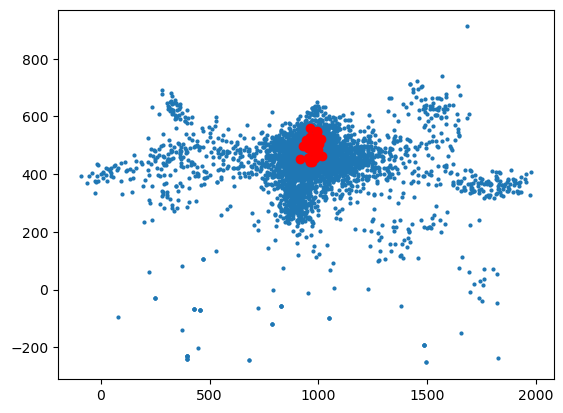

In [3]:
print(coms)
plt.plot(validData[:, 4], validData[:, 5], 'o', markersize=2)
for i in range(int(sum(inds))):
    plt.plot(coms[0, i], coms[1, i], 'o', color='red')
plt.show()

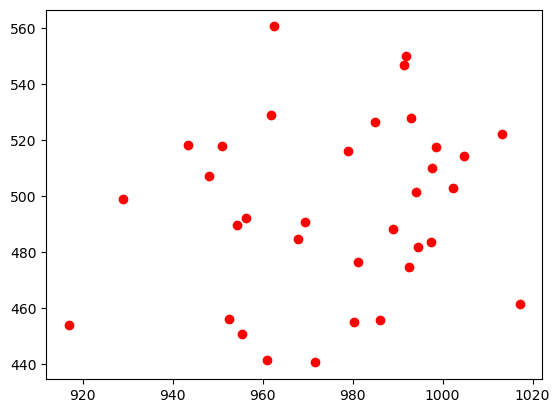

In [4]:
for i in range(int(sum(inds))):
    plt.plot(coms[0, i], coms[1, i], 'o', color='red')
plt.show()

Now we'll compare with the diamond method

In [5]:
def diamFunc(p, data):
    n = len(data[:, 0])
    dispMatr = np.ones(shape=(n))[None].T @ p[None]
    sumMatr = abs(data-dispMatr) @ np.array([1, 1])
    inds = np.where(abs(sumMatr)<100)[0]
    l = len(inds)
    if l==0:
        return 99999999
    else:
        sum = 0
        for i in range(l):
            sum = sum + data[inds[i], :] @ data[inds[i], :]
        return sum/l**2

coms = np.zeros(shape=(2, int(sum(inds))))
m = 0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        psoFunc = lambda p: diamFunc(p, validData[:, 4:])
        seed = random.randrange(0, sys.maxsize); random.seed(seed)
        pso = PSO(func=psoFunc, n_dim=2, pop=40, max_iter=30, lb=[0, 0], ub=[1920, 1080], w=0.7, c1=0.5, c2=0.5) # performs PSO fitting over omegas
        pso.run()

        coms[:, m] = pso.gbest_x
        m = m + 1

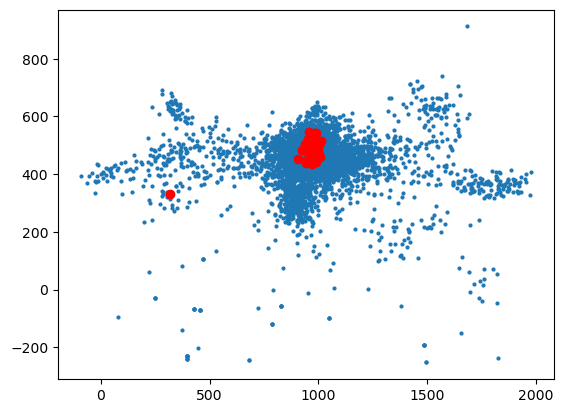

In [6]:
plt.plot(validData[:, 4], validData[:, 5], 'o', markersize=2)
for i in range(int(sum(inds))):
    plt.plot(coms[0, i], coms[1, i], 'o', color='red')
plt.show()

Finally, we'll do the same with a box function

In [16]:
from sko.PSO import PSO
import random
import sys

def boxFunc(p, data):
    n = len(data[:, 0])
    dispMatr = np.ones(shape=(n))[None].T @ p[None]
    newData = data-dispMatr
    inds = np.where(np.logical_and(abs(newData[:, 0])<100, abs(newData[:, 1])<100))[0]
    l = len(inds)
    if l==0:
        return 99999999
    else:
        sum = 0
        for i in range(l):
            sum = sum + data[inds[i], :] @ data[inds[i], :]
        return sum/l**2

coms = np.zeros(shape=(2, int(sum(inds))))
m = 0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        psoFunc = lambda p: boxFunc(p, validData[:, 4:])
        seed = random.randrange(0, sys.maxsize); random.seed(seed)
        pso = PSO(func=psoFunc, n_dim=2, pop=40, max_iter=30, lb=[0, 0], ub=[1920, 1080], w=0.7, c1=0.5, c2=0.5) # performs PSO fitting over omegas
        pso.run()

        coms[:, m] = pso.gbest_x
        m = m + 1

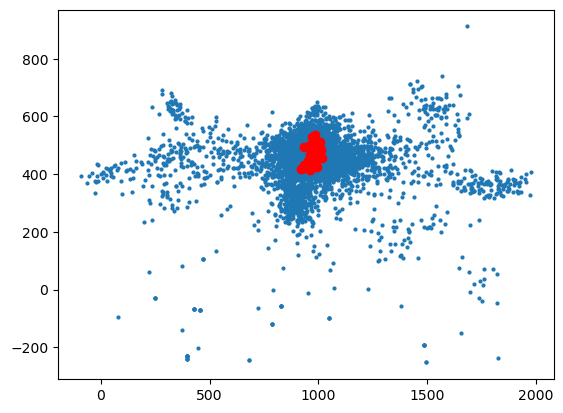

In [17]:
plt.plot(validData[:, 4], validData[:, 5], 'o', markersize=2)
for i in range(int(sum(inds))):
    plt.plot(coms[0, i], coms[1, i], 'o', color='red')
plt.show()